In [28]:
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import numpy as np
from datetime import datetime

## Case Study: 2014-04-27

### Loading the time and origins of the dust events

In [29]:
df = pd.read_csv('Dust_LatLon_Drobo_Complete_June2022_Jesse - Data LatLon.csv')

In [30]:
df_case = df[df["Date (YYYYMMDD)"] == 20140427.0]

In [31]:
df_case

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Notes,New GOES Notes,Julian day,GOES Raw,GOES Images,Unnamed: 13,Unnamed: 14,Unnamed: 15
1696,20140427.0,2014.0,4.0,27.0,37.9,-101.9,1630.0,x,SWIRD,NE,NaN,NaN,NaN,NaN,NaN,NaN
1697,20140427.0,2014.0,4.0,27.0,36.2,-101.5,1600.0,x,NaN,Northern Panhandle TX,14117.0,NaN,NaN,NaN,NaN,NaN
1698,20140427.0,2014.0,4.0,27.0,34.9,-103.2,1530.0,x,NaN,Eastern NM,NaN,NaN,NaN,NaN,NaN,NaN
1699,20140427.0,2014.0,4.0,27.0,33.8,-103.0,1600.0,x,NaN,Western TX,NaN,NaN,NaN,NaN,NaN,NaN
1700,20140427.0,2014.0,4.0,27.0,32.6,-106.2,1630.0,x,NaN,Western TX,NaN,NaN,NaN,NaN,NaN,NaN
1701,20140427.0,2014.0,4.0,27.0,32.0,-103.5,1630.0,x,NaN,Southeastern NM,NaN,NaN,NaN,NaN,NaN,NaN
1702,20140427.0,2014.0,4.0,27.0,31.5,-107.5,1600.0,x,NaN,Northern CHH,NaN,NaN,NaN,NaN,NaN,NaN


### Creating the NARR map for the case study

Data collected from the table here: https://psl.noaa.gov/data/gridded/data.narr.html
* hgt: Geopotential Height, 8x daily

In [32]:
hgt_ds = xr.open_dataset('hgt.201404.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [33]:
level = 500  #hPa
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=slice(3000000, 9000000)
y=slice(0, 6000000)

hgt_ds_sel = hgt_ds.sel(level=level, time=dt, x=x, y=y)

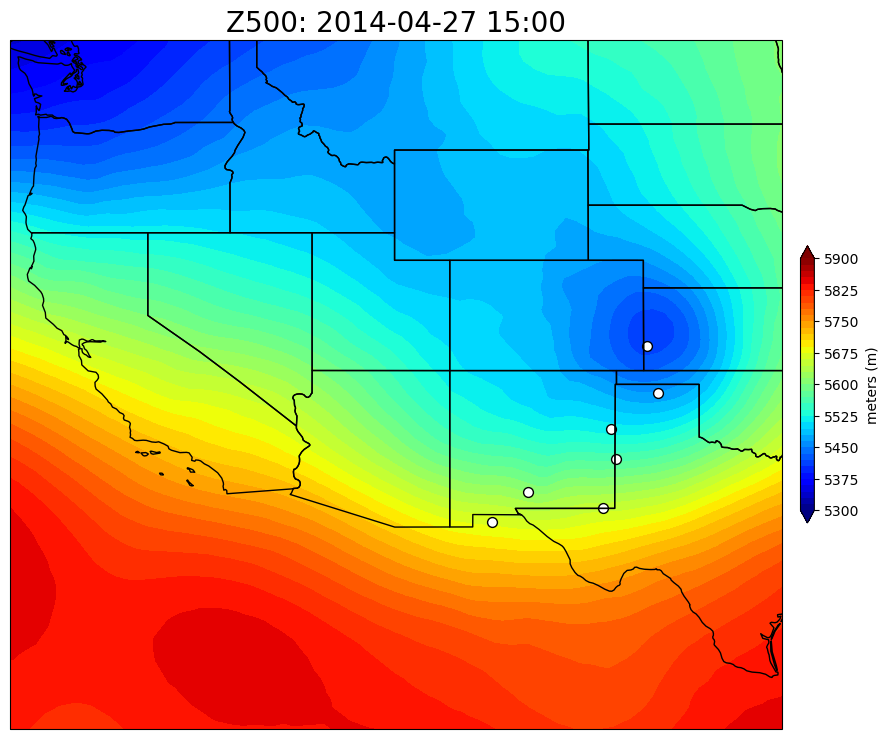

In [34]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.jet
#levels = np.linspace(np.min(hgt_ds_sel.hgt), np.max(hgt_ds_sel.hgt), 41)

#--- Z500 levels
levels = np.linspace(5300, 5900, 41)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())
z=ax.contourf(hgt_ds_sel.lon, hgt_ds_sel.lat, hgt_ds_sel.hgt, cmap=cmap, levels=levels, extend='both')
dust=ax.scatter(df_case.longitude, df_case.latitude, c='white', edgecolors='black', s=50)

clb=plt.colorbar(z, shrink=0.3, pad=0.02, ax=ax)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Z'+str(level)+ ': '+formatted_dt, size=20)
clb.set_label('meters (m)')


ax.add_feature(cfeature.STATES)

### Creating the 850mb geopotential + 850mb temperature figure

In [35]:
temp_ds = xr.open_dataset('air.201404.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'air' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [36]:
level = 850  #hPa
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=slice(3000000, 9000000)
y=slice(0, 6000000)

hgt_ds_sel = hgt_ds.sel(level=level, time=dt, x=x, y=y)
temp_ds_sel = temp_ds.sel(level=level, time=dt, x=x, y=y)

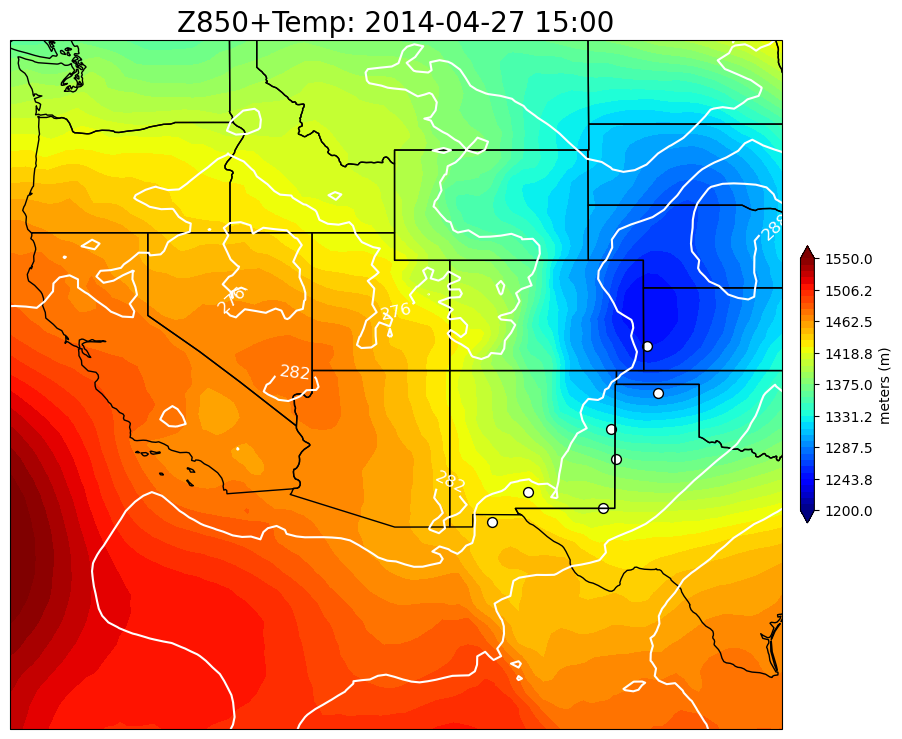

In [37]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.jet
#levels = np.linspace(np.min(hgt_ds_sel.hgt), np.max(hgt_ds_sel.hgt), 41)

#--- Z850 levels
levels = np.linspace(1200, 1550, 41)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())

z=ax.contourf(hgt_ds_sel.lon, hgt_ds_sel.lat, hgt_ds_sel.hgt, cmap=cmap, levels=levels, extend='both')
clb=plt.colorbar(z, shrink=0.3, pad=0.02, ax=ax)

temp=ax.contour(temp_ds_sel.lon, temp_ds_sel.lat, temp_ds_sel.air, colors='white')
cl=plt.clabel(temp, inline=True, fmt='%1i', fontsize=12)

dust=ax.scatter(df_case.longitude, df_case.latitude, c='white', edgecolors='black', s=50)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Z'+str(level)+'+Temp: '+formatted_dt, size=20)
clb.set_label('meters (m)')


ax.add_feature(cfeature.STATES)

### Creating the mean surface level pressure + wind figure

In [38]:
mslp_ds = xr.open_dataset('prmsl.2014.nc')
u_ds = xr.open_dataset('uwnd.10m.2014.nc')
v_ds = xr.open_dataset('vwnd.10m.2014.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'prmsl' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'uwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'vwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [39]:
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=slice(3000000, 9000000)
y=slice(0, 6000000)

mslp_ds_sel = mslp_ds.sel(time=dt, x=x, y=y)
u_ds_sel = u_ds.sel(time=dt, x=x, y=y)
v_ds_sel = v_ds.sel(time=dt, x=x, y=y)

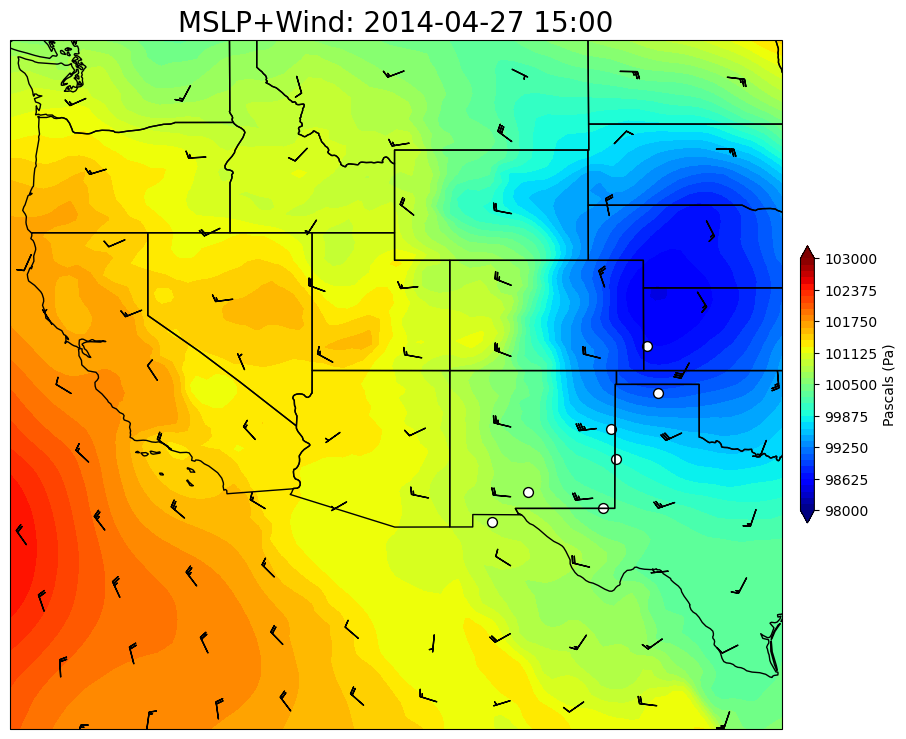

In [40]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.jet
#levels = np.linspace(np.min(mslp_ds_sel.prmsl), np.max(mslp_ds_sel.prmsl), 41)

#--- Z850 levels
levels = np.linspace(98000, 103000, 41)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())

z=ax.contourf(mslp_ds_sel.lon, mslp_ds_sel.lat, mslp_ds_sel.prmsl, cmap=cmap, levels=levels, extend='both')
clb=plt.colorbar(z, shrink=0.3, pad=0.02, ax=ax)


n = 9
x = u_ds_sel.lon[::n, ::n]
y = u_ds_sel.lat[::n, ::n]
u = u_ds_sel.uwnd[::n, ::n]
v = v_ds_sel.vwnd[::n, ::n]
ax.barbs(x, y, u, v, length=5, sizes=dict(emptybarb=0), barb_increments=dict(half=2, full=4, flag=20))

dust=ax.scatter(df_case.longitude, df_case.latitude, c='white', edgecolors='black', s=50)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('MSLP+Wind: '+formatted_dt, size=20)
clb.set_label('Pascals (Pa)')


ax.add_feature(cfeature.STATES)

### Creating the zonal wind with altitude figure

In [41]:
u_ds = xr.open_dataset('uwnd.201404.nc')
v_ds = xr.open_dataset('vwnd.201404.nc')
temp_ds = xr.open_dataset('air.201404.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'uwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'vwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'air' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Determine the range for the u-wind analysis: 

In [42]:
level = 1000  #hPa
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=slice(5900000, 6000000)
y=slice(2000000, 3500000)

u_ds_sel = u_ds.sel(level=level, time=dt, x=x, y=y)

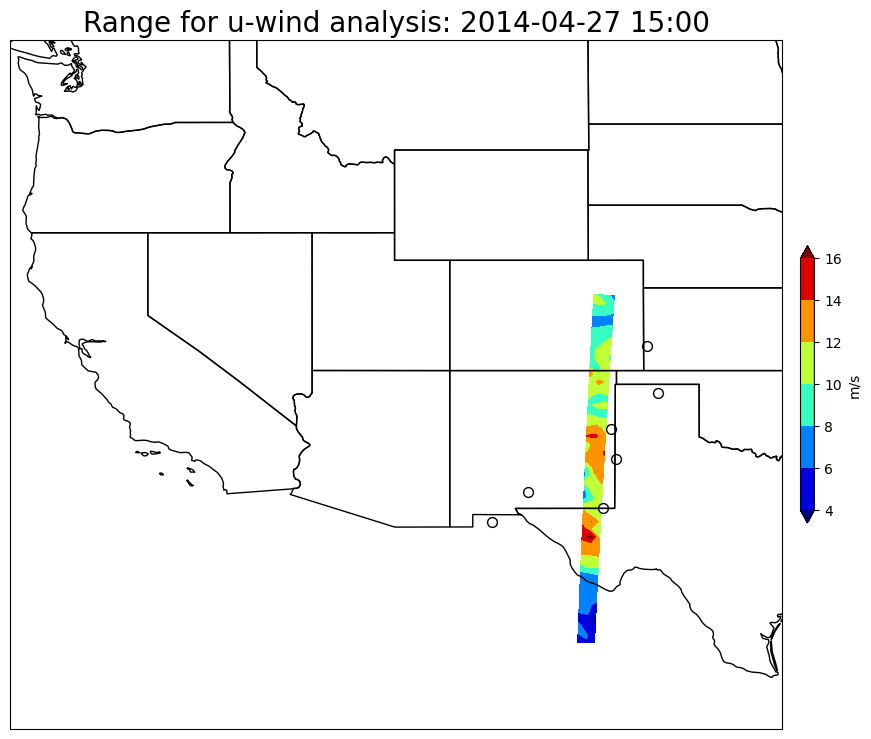

In [43]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.jet

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())

z=ax.contourf(u_ds_sel.lon, u_ds_sel.lat, u_ds_sel.uwnd, cmap=cmap, extend='both')
clb=plt.colorbar(z, shrink=0.3, pad=0.02, ax=ax)

dust=ax.scatter(df_case.longitude, df_case.latitude, c='white', edgecolors='black', s=50)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Range for u-wind analysis: '+formatted_dt, size=20)
clb.set_label('m/s')


ax.add_feature(cfeature.STATES)

Take the mean of the u-wind across the x-dimension: 

In [44]:
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=5908266.0
y=slice(2000000, 3500000)

u_ds_sel = u_ds.sel(time=dt, x=x, y=y)
v_ds_sel = v_ds.sel(time=dt, x=x, y=y)
temp_ds_sel = temp_ds.sel(time=dt, x=x, y=y)

#u_ds_sel = u_ds_sel.mean(dim='x')

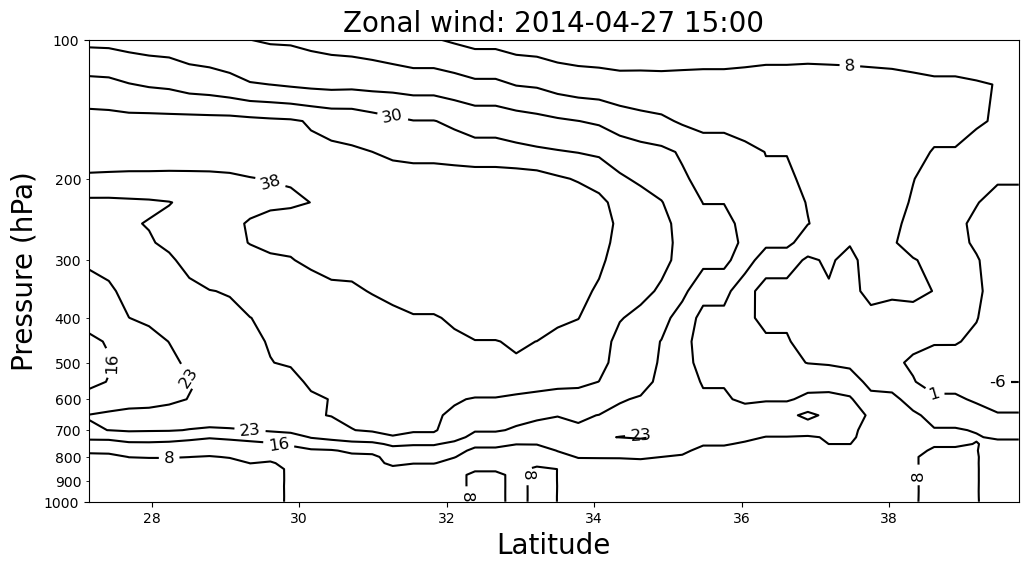

In [46]:
fig,ax=plt.subplots(1, figsize=(12,6))
ax.set_yscale('log')
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
                    
levels = np.linspace(np.min(u_ds_sel.uwnd), np.max(u_ds_sel.uwnd), 8)

u=ax.contour(u_ds_sel.lat, u_ds_sel.level, u_ds_sel.uwnd, levels=levels, colors='black')
cl=plt.clabel(u, inline=True, fmt='%1i', fontsize=12)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Zonal wind: '+formatted_dt, size=20)
ax.set_xlabel('Latitude', size=20)
ax.set_ylabel('Pressure (hPa)', size=20)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

Calculating the potential temperature: 

$$
\theta = T\left(\frac{1000}{P}\right)^{\frac{R_d}{C_p}}
$$

In [45]:
temp_ds_sel.level

PT = temp_ds_sel.air * (1000/temp_ds_sel.air.level)**.286

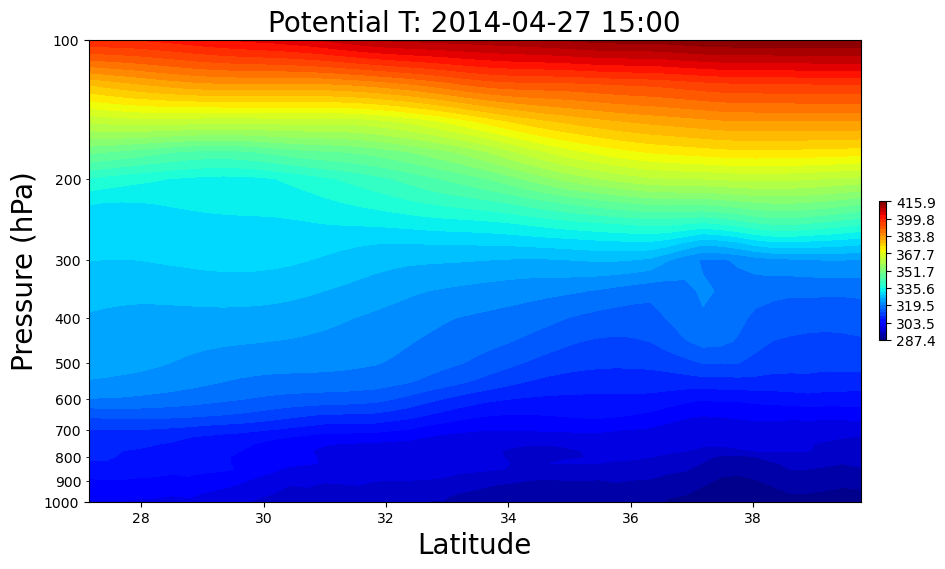

In [47]:
fig,ax=plt.subplots(1, figsize=(12,6))
ax.set_yscale('log')
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())
cmap = plt.cm.jet
levels = np.linspace(np.min(PT), np.max(PT), 41)

pt=ax.contourf(u_ds_sel.lat, u_ds_sel.level, PT, cmap=cmap, levels=levels)
clb=plt.colorbar(pt, shrink=0.3, pad=0.02, ax=ax)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Potential T: '+formatted_dt, size=20)
ax.set_xlabel('Latitude', size=20)
ax.set_ylabel('Pressure (hPa)', size=20)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

Horizontal potential temperature: 

In [49]:
pottemp_ds = xr.open_dataset('pottmp.hl1.2014.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'pottmp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Calculating the potential vorticity: 

$$
q = \frac{\zeta + f}{\theta}
$$

$$
f = 2\Omega \text{sin}\phi
$$

$$
\zeta = \frac{dv}{dx} - \frac{du}{dy}
$$

In [52]:
phi = latitudes
omega = 7.3e-5 #rad s-1

f = omega * np.sin(phi)
zeta = dv/dx - du/dy

q = (zeta + f)/PT

NameError: name 'latitudes' is not defined

## Estimating blowing dust potential in case study


In [21]:
#--- Gravitational force
rho_p = 1500 # kg m-3 | particle density
rho_a = 1.23 # kg m-3 | air density
g = 9.81 # m s-2 | gravity force
D_p = 5e-4 # m | particle diameter

F_g = (np.pi/6) * (rho_p - rho_a) * g * (D_p**3)

print("Gravitational force:", F_g, "kg m s-2" ) 

Gravitational force: 9.623047603778707e-07 kg m s-2


In [22]:
#--- Shear velocity
#u_star = A_ft * np.sqrt(((rho_p-rho_a)/rho_a)*g*D_p)
u_ds = xr.open_dataset('uwnd.10m.2014.nc')
v_ds = xr.open_dataset('vwnd.10m.2014.nc')
dt = datetime(2014, 4, 27, 15, 0, 0, 0) 
x=slice(3000000, 9000000)
y=slice(0, 6000000)

u_ds_sel = u_ds.sel(time=dt, x=x, y=y)
v_ds_sel = v_ds.sel(time=dt, x=x, y=y)
u_star = np.sqrt(u_ds_sel.uwnd.values**2+v_ds_sel.vwnd.values**2)

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'uwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'vwnd' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [23]:
#--- Drag force
K_d = 10 # unitless | coefficient
A_ft = 0.1 # unitless | coefficient

F_d = K_d * rho_a * (D_p**2) * (u_star**2)

print("Drag force:", F_d, "kg m-1 s-2" )

Drag force: [[1.45127502e-04 1.42527308e-04 1.42297868e-04 ... 7.39902680e-05
  6.01086176e-05 5.19736641e-05]
 [9.04579501e-05 1.17467585e-04 1.07105938e-04 ... 4.14079186e-05
  6.01086176e-05 3.44892251e-05]
 [9.04579501e-05 9.00313098e-05 6.33436866e-05 ... 3.54263648e-05
  2.69778775e-05 3.44151413e-05]
 ...
 [9.21413957e-05 8.50711949e-05 8.45116956e-05 ... 1.14042065e-04
  1.20975048e-04 6.63347528e-05]
 [7.00719684e-05 8.49961580e-05 6.96825518e-05 ... 1.25759761e-04
  6.72322785e-05 6.74357580e-05]
 [6.08382761e-05 5.92313736e-05 6.17267942e-05 ... 8.92795069e-05
  1.00197678e-04 7.84694275e-05]] kg m-1 s-2


In [24]:
#--- Lift force
F_l = F_d/10

#--- Interparticle forces
F_ip = 10e-5

**Still needs some sort of wind in the lift force**

In [25]:
lifted = F_d > (F_g - F_l) + F_ip
u_star[~lifted] = 0

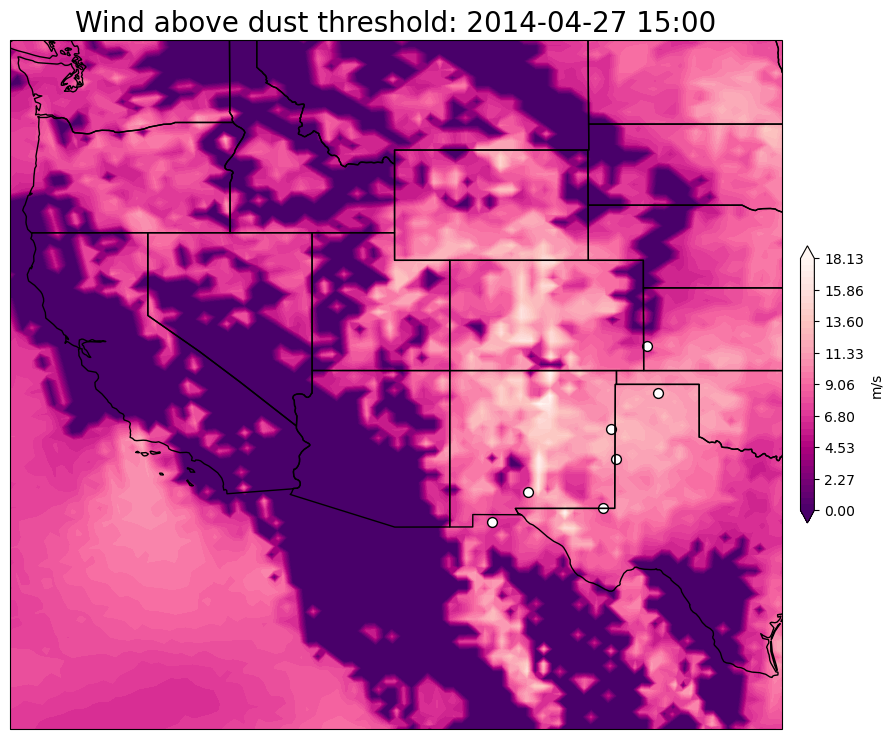

In [26]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdPu_r
levels = np.linspace(np.min(u_star), np.max(u_star), 41)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())

z=ax.contourf(u_ds_sel.lon, u_ds_sel.lat, u_star, cmap=cmap, levels=levels, extend='both')
clb=plt.colorbar(z, shrink=0.3, pad=0.02, ax=ax)

dust=ax.scatter(df_case.longitude, df_case.latitude, c='white', edgecolors='black', s=50)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Wind above dust threshold: '+formatted_dt, size=20)
clb.set_label('m/s')


ax.add_feature(cfeature.STATES)